# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [1]:
# Importer resten av pakkene du trenger her:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error


In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

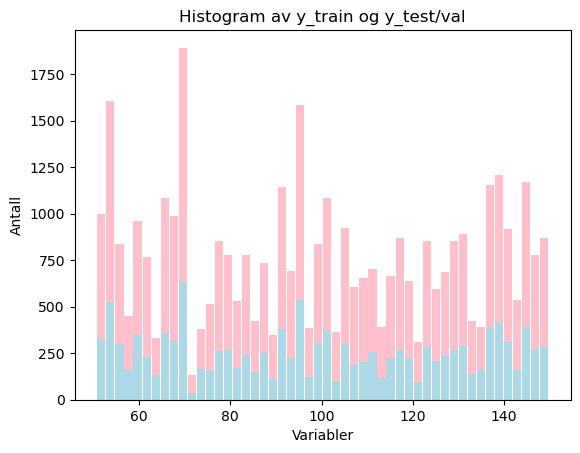

In [3]:
# visualiser y_train og y_test i et histogram

#Plot histogram med 50 bins, farge og bredde på stolpene
plt.hist(y_train, bins=50, color='pink', rwidth=0.9)
plt.hist(y_test, bins=50, color='lightBlue', rwidth=0.9)
plt.xlabel("Variabler")
plt.ylabel("Antall")
plt.title("Histogram av y_train og y_test/val")
plt.show()

**Svar:**

Problemet er et regresjonsproblem fordi variabelen y_train og y_test er kontinuerlig.

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [4]:
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    
    # Fullfør koden

    # Beregner korrelasjonsmatrisen for alle variablene
    correlation_matrix = X_temp.corr()

    # Plot korrelasjonsmatrisen som heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", fmt=".2f")
    plt.title("Korrelasjonsmatrise")
    plt.show()

    return correlation_matrix

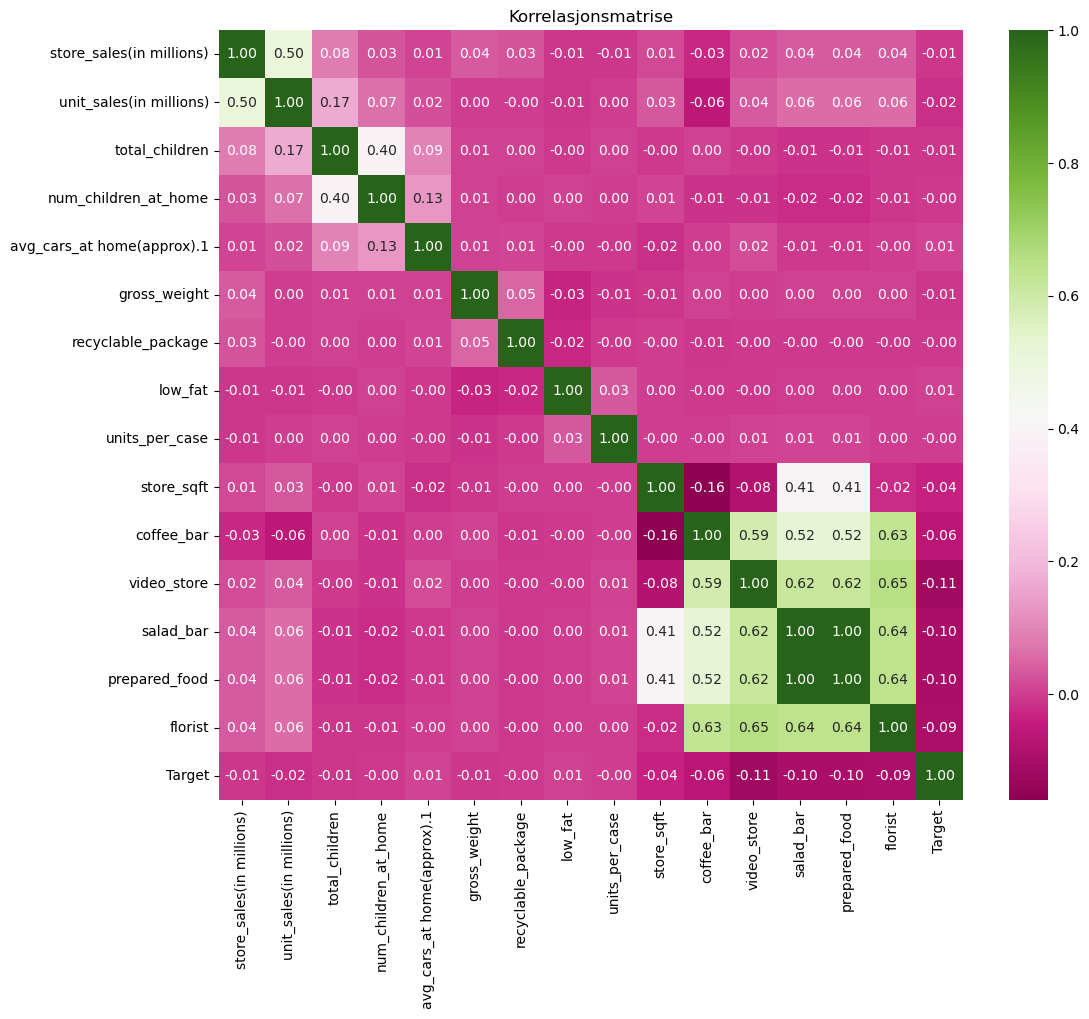

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,Target
store_sales(in millions),1.000000,0.503094,0.084815,0.028274,0.008275,0.038720,0.029761,-0.006231,-0.006661,0.014207,-0.025849,0.017118,0.036112,0.036112,0.036457,-0.007580
unit_sales(in millions),0.503094,1.000000,0.166990,0.065623,0.022925,0.000310,-0.000317,-0.005749,0.001013,0.032080,-0.055652,0.036065,0.061034,0.061034,0.060007,-0.015122
total_children,0.084815,0.166990,1.000000,0.395067,0.094713,0.006301,0.003725,-0.001365,0.004459,-0.002458,0.003532,-0.002435,-0.014296,-0.014296,-0.005763,-0.008282
num_children_at_home,0.028274,0.065623,0.395067,1.000000,0.132525,0.006796,0.000167,0.003620,0.000354,0.008148,-0.013611,-0.012737,-0.022278,-0.022278,-0.007403,-0.003972
avg_cars_at home(approx).1,0.008275,0.022925,0.094713,0.132525,1.000000,0.005098,0.009903,-0.002909,-0.003225,-0.016227,0.000498,0.018033,-0.005407,-0.005407,-0.000363,0.011515
gross_weight,0.038720,0.000310,0.006301,0.006796,0.005098,1.000000,0.052712,-0.029259,-0.012669,-0.007045,0.003939,0.001925,0.004061,0.004061,0.004732,-0.005812
recyclable_package,0.029761,-0.000317,0.003725,0.000167,0.009903,0.052712,1.000000,-0.024450,-0.001952,-0.001043,-0.005810,-0.002870,-0.003861,-0.003861,-0.003574,-0.004120
low_fat,-0.006231,-0.005749,-0.001365,0.003620,-0.002909,-0.029259,-0.024450,1.000000,0.031132,0.000312,-0.001456,-0.004469,0.000565,0.000565,0.000384,0.006894
units_per_case,-0.006661,0.001013,0.004459,0.000354,-0.003225,-0.012669,-0.001952,0.031132,1.000000,-0.000248,-0.000309,0.005346,0.008839,0.008839,0.001513,-0.000035
store_sqft,0.014207,0.032080,-0.002458,0.008148,-0.016227,-0.007045,-0.001043,0.000312,-0.000248,1.000000,-0.159718,-0.081715,0.406314,0.406314,-0.021571,-0.035699


In [5]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**


video_store har den sterkeste negative korrelasjonen med Target, med en korrelasjonsverdi på -0.11. Verdien er ganske svak, det betyr at når verdien for video_store øker, har Target (kostnaden) en svak tendens til å synke. 

Andre egenskaper som også har en svak negativ korrelasjon med Target inkluderer salad_bar (-0.10), prepared_food (-0.10), florist (-0.09), og coffee_bar (-0.06). 


#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [6]:
# Utfør hyperparametersøk for en modell

# Velg modellarkitektur - GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)

# Intervall over hyperparameter for Grid Search
param_grid = {
"n_estimators": [150, 200, 250],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7, 10]
}

# Konfigurer GridSearchCV med 3-fold kryssvalidering og "neg_mean_squared_error"
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Henter beste parametere og beste score
best_params = grid_search.best_params_
best_model = GradientBoostingRegressor(**best_params, random_state=0)
best_score = -grid_search.best_score_  # Konverter til positiv verdi for å lese

print("Beste parametere:", best_params)
print("Beste skår (Mean Squared Error):", best_score)

Beste parametere: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
Beste skår (Mean Squared Error): 851.613038761282


**Svar:**
modellarkitektur: GradientBoostingRegressor.

Beste parameterkombinasjonen med minst 2 verdier:

n_estimators: 250
Learning_rate: 0.01
max_depth: 5

Resulterer i en Mean Squared Error (MSE) på **851.61**. Kombinasjonen forbedrer modellens nøyaktighet og gjør den i stand til å fange opp komplekse mønstre i dataene.

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [7]:
# Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

# Bruk de beste hyperparameterne fra forrige oppgave
best_model = GradientBoostingRegressor(**best_params, random_state=0)

# Definer scorers for MAE og MSE
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)

# Kryssvalidering med K=5 for MAE og MSE
mae_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=mae_scorer)
mse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=mse_scorer)

print("Mean Absolute Error (MAE):", mae_scores)
print("Mean Squared Error (MSE):", mse_scores)


Mean Absolute Error (MAE): [25.27628411 25.34506292 25.38642636 25.07614041 24.89197634]
Mean Squared Error (MSE): [854.64449142 855.90765709 861.28304489 843.87240282 841.05697067]


In [8]:
# Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

# Beregn gjennomsnitt og standardavvik for MAE og MSE
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Beregn gjennomsnittlig faktisk pris i treningsdataene
avg_actual_price = np.mean(y_train)

# Beregn den gjennomsnittlige feilen av den gjennomsnittlige faktiske prisen
relative_error_percentage = (mean_mae / avg_actual_price) * 100

print("Gjennomsnittlig MAE:", mean_mae)
print("Standardavvik for MAE:", std_mae)
print("Gjennomsnittlig MSE:", mean_mse)
print("Standardavvik for MSE:", std_mse)
print("Gjennomsnittlig faktisk pris:", avg_actual_price)
print("Relativ gjennomsnittlig feil på prediksjon (MAE / gj.snittlig faktisk pris) i prosent:", relative_error_percentage)

Gjennomsnittlig MAE: 25.195178029091593
Standardavvik for MAE: 0.18532178574104496
Gjennomsnittlig MSE: 851.3529133791193
Standardavvik for MSE: 7.643980148009084
Gjennomsnittlig faktisk pris: 99.33601837910804
Relativ gjennomsnittlig feil på prediksjon (MAE / gj.snittlig faktisk pris) i prosent: 25.36358758908193


**Svar:**

Kryssvalideringen viser en gjennomsnittlig Mean Absolute Error (MAE) på 25.19 og Mean Squared Error (MSE) på 851.35, begge med lave standardavvik (MAE: 0.18 og MSE: 7.64), noe som indikerer stabil ytelse. 

Den relative gjennomsnittlige feilen, med MAE på 25.36% av den gjennomsnittlige faktiske prisen, tyder på at modellen avviker med omtrent 1/4 av prisen, noe som gir et moderat nøyaktighet. 

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [9]:
# Tren modellen på alle treningsdata og utfør prediksjon på testdataene

# Tren modellen på hele treningssettet med de optimale parameterne fra oppgave 1.3
best_model = GradientBoostingRegressor(**best_params, random_state=0)
best_model.fit(X_train, y_train)

# Prediksjoner på testsettet
y_pred = best_model.predict(X_test)

# Beregn Mean Absolute Error (MAE) på testsettet
test_mae = mean_absolute_error(y_test, y_pred)

# Beregn gjennomsnittlig faktisk pris i testdataene
avg_actual_price_test = np.mean(y_test)

# Beregn den relative gjennomsnittlige feilen på prediksjonen i prosent
relative_error_test_percentage = (test_mae / avg_actual_price_test) * 100

print("Mean Absolute Error (MAE):", test_mae)
print("Gjennomsnittlig faktisk pris:", avg_actual_price_test)
print("Relativ gjennomsnittlig feil i prosent:", relative_error_test_percentage)


Mean Absolute Error (MAE): 25.243816905188947
Gjennomsnittlig faktisk pris: 99.30020325519818
Relativ gjennomsnittlig feil i prosent: 25.421717255012243


**Svar:**

Den gjennomsnittlige absolutte feilen (MAE) på testsettet er 25.24, mens den gjennomsnittlige faktiske prisen i testdataene er 99.30. Dette tilsvarer en relativ feil på 25.42%, som betyr at modellens prediksjoner i gjennomsnitt avviker med rundt 1/4 av prisen. 

Den relative feilen på testdataene er nær det vi så under kryssvalideringen, noe som viser at modellen presterer stabilt.